In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

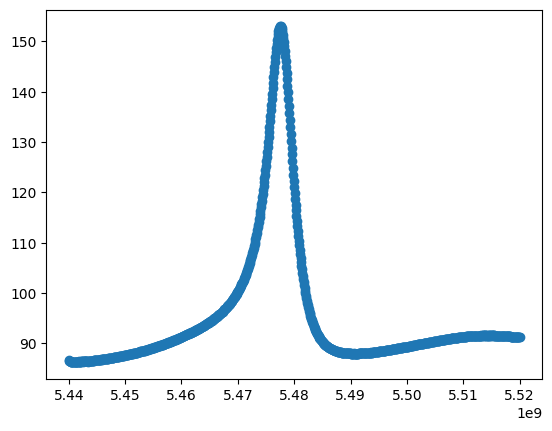

In [2]:
# Read data 
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
raw_data = np.loadtxt(path, delimiter=' ', skiprows=0)
transmission_squared_data = raw_data[:,1]**2

plt.plot(raw_data[:,0], transmission_squared_data, 'o')

In [3]:
def transmission_squared(f, A1, A2, A3, A4, fr, Qr):
    delta_f = f - fr
    return A1 + A2 * delta_f + (A3 + A4 * delta_f) / (1 + 4 * Qr**2 * (delta_f / fr)**2)


# Chi-square cost function for iminuit
def chi_square(A1, A2, A3, A4, fr, Qr):
    model = transmission_squared(f, A1, A2, A3, A4, fr, Qr)
    residuals = (transmission_squared_data - model)
    # We dont have any information about the error of the data points
    transmission_squared_data_error = np.ones_like(transmission_squared_data)
    chi2 = np.sum((residuals / transmission_squared_data_error)**2)
    return chi2

In [4]:
# Fit data
A1_init = 1
A2_init = 1
A3_init = 1
A4_init = 1
fr_init = 5.477e9
Qr_init = 900

p0 = [A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init]

f = raw_data[:,0]

popt, pcov = curve_fit(transmission_squared, f, transmission_squared_data, p0=p0)
popt

array([ 8.84362918e+01,  1.14882494e-07,  6.26807624e+01, -7.77889029e-06,
        5.47808711e+09,  1.00365205e+03])

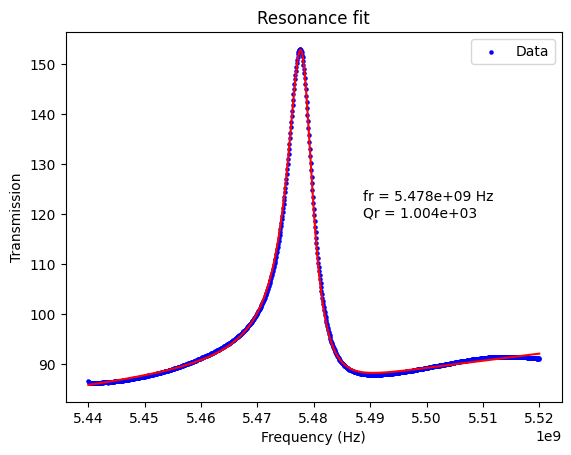

In [15]:
# Plot fit
plt.plot(f, transmission_squared(f, *popt), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(popt[4], popt[5]), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

In [5]:
from iminuit import Minuit

f = raw_data[:,0]

# Initial parameter guesses
A1_init, A2_init, A3_init, A4_init, fr_init, Qr_init = 1, 1, 1, 1, 5.477e9, 900

# Initialize Minuit
minuit = Minuit(chi_square, A1=A1_init, A2=A2_init, A3=A3_init, A4=A4_init, fr=fr_init, Qr=Qr_init)

# Fit using Minuit
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 136.4                      │             Nfcn = 1358              │
│ EDM = 8.51e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1   │   88.44   │   0.04    │            │            │         │         │       │
│ 1 │ A2   │ 114.9e-9  │  1.8e-9   │            │            │         │         │       │
│ 2 │ A3   │   62.68   │   0.20    │            │            │         │         │       │
│ 3 │ A4   │ -7.78e-6  │  0.10e-6  │            │            │         │         │       │
│ 4 │ fr   │5.478087e9 │0.000013e9 │            │            │         │         │       │
│ 5 │ Qr   │  1.004e3  │  0.005e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │                  A1                  A2                  A3                  A4                  fr                  Qr │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ A1 │             0.00158      -6.7361593e-12             -0.0008        -1.117973e-9             67.7092              0.0793 │
│ A2 │      -6.7361593e-12            3.18e-18     -84.6689446e-12           -87.6e-18 10.8531204392083e-6    -1.8310923685e-9 │
│ A3 │             -0.0008     -84.6689446e-12              0.0412        -237.964e-12             -968.99                0.56 │
│ A4 │        -1.117973e-9           -87.6e-18        -237.964e-12             1.1e-14   -968.136301636e-6      -190.638281e-9 │
│ fr │             67.7092 10.8531204392083e-6             -968.99   -968.136301636e-6             1.8e+08            -5.569e3 │
│ Qr │              0.0793    -1.8310923685e-9                0.56      -190.638281e-9            -5.569e3                  22 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

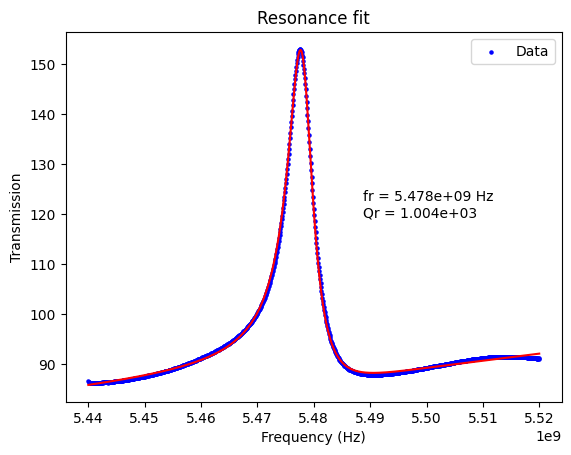

In [6]:
# Extract fit parameters
best_fit_params = minuit.values
best_fit_params_dict = best_fit_params.to_dict()
params_list = list(best_fit_params_dict.values())

# Plot fit
plt.plot(f, transmission_squared(f, *params_list), 'r')
plt.scatter(f, transmission_squared_data, c='b', s=5, label='Data')
# Add text to say fr and Qr and their errors
plt.text(0.6, 0.5, 'fr = {:.3e} Hz\nQr = {:.3e}'.format(best_fit_params_dict['fr'], best_fit_params_dict['Qr']), transform=plt.gca().transAxes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transmission')
plt.title('Resonance fit')
plt.legend()
plt.show()

## Testing the fitting library

### Test fit quasi magicus

In [25]:
# Example usage
from iminuit.cost import LeastSquares
from FitAPI import Fitter, Model
import numpy as np

path = '../Data/fit_test/Resonances/20mK_-35dBm.txt'
data = np.loadtxt(path, delimiter=' ', skiprows=0)
f = data[:,0]
#x = data[:,0]
y = data[:,1]

fmin = f[np.argmin(y)]

# Convert to linear scale
y = 10**(y/20)

def S21_model(f: np.ndarray, f0: float, phi: float, Qt: float, Qc: float, A: float, B: float, C: float, D: float, K: float) -> np.ndarray:
    return (A + B*(f-fmin) + C*(f-fmin)**2 + D*(f-fmin)**3) + K * np.abs((1 - (Qt/np.abs(Qc))*np.exp(1j*phi)/(1 + 2j*Qt*((f-fmin) - f0)/fmin)))

initial_guess = {
    "f0": 0.01,
    "phi": 0.01,
    "Qc": 1e3,
    "A": 1.0,
    "B": 1e-9,
    "C": 1e-18,
    "D": 1e-27
}

# Estimate the initial guess of Qt
def peak_width(datax, datay):
    half_height_value = np.min(datay) + (np.max(datay) - np.min(datay)) / np.sqrt(2)
    hits = []
    above = datay[0] > half_height_value
    for i in range(1, len(datay)):
        new_above = datay[i] > half_height_value
        if new_above != above: 
            hits.append((datax[i] + datax[i-1]) / 2)
            above = new_above
    return abs(hits[-1] - hits[0])
    

#Q_i = fmin / peak_width(f, -y)
#Qt_guess = 1/(1/initial_guess['Qc'] + 1/Q_i)
Qt_guess = fmin / peak_width(f, -y)
print(f"Qt_guess: {Qt_guess}")
initial_guess['Qt'] = Qt_guess

#initial_guess['Qt'] = 780

# Estimate the initial guess of K
initial_guess['K'] = (np.max(y) - np.min(y)) * initial_guess['Qc'] / initial_guess['Qt']

print(f"Initial guess: {initial_guess}")

fit_data = np.column_stack((f, y))
fitter = Fitter(model_function=S21_model, 
                param_names=["f0", "phi", "Qt", "Qc", "A", "B", "C", "D", "K"], 
                data=fit_data, 
                loss_function=LeastSquares,
                params_initial_guess=initial_guess)

result = fitter.fit_quasi_magicus()


Qt_guess: 1670.1951219512196
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1670.1951219512196), 'K': np.float64(0.08143137290877292)}
First total fit converged good, p-value = 1.0


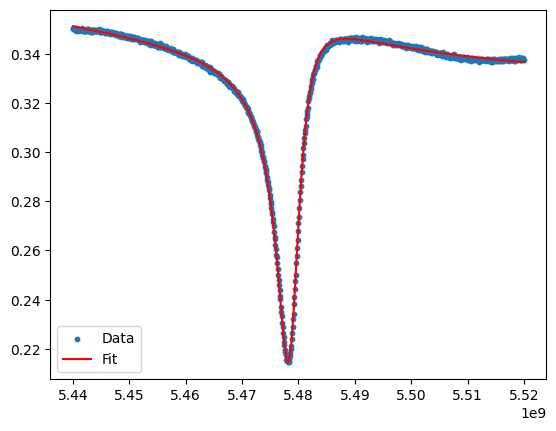

In [18]:
import sys
sys.path.append('../Graphics')
from Graphs import fitPlotter
grapher = fitPlotter(result, f, y, S21_model)
grapher.simple_plot()

In [19]:
result

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 37.61 (χ²/ndof = 0.0)      │              Nfcn = 847              │
│ EDM = 4.56e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f0   │  0.276e6  │  0.017e6  │            │            │         │         │       │
│ 1 │ phi  │   2.623   │   0.010   │            │            │         │         │       │
│ 2 │ Qt   │  1.288e3  │  0.011e3  │            │            │         │         │       │
│ 3 │ Qc   │  1.380e3  │  0.004e3  │            │            │         │         │       │
│ 4 │ A    │ 487.5e-3  │  0.9e-3   │            │            │         │         │       │
│ 5 │ B    │ -0.297e-9 │ 0.017e-9  │            │            │         │         │       │
│ 6 │ C    │ 1.13e-18  │ 0.29e-18  │            │            │         │         │       │
│ 7 │ D    │ 0.014e-24 │ 0.014e-24 │            │            │         │         │       │
│ 8 │ K    │ -144.4e-3 │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │                                   f0                                  phi                                   Qt                                   Qc                                    A                                    B                                    C                                    D                                    K │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  f0 │                             2.75e+08                           -128.78194                             -14.16e3                             -9.371e3                          971.2682e-3               -138.41139693126226e-9         442.89343657652204910846e-18 88.50420326597411246893898351118e-24                           -1.6625500 │
│ phi │                           -128.78194                             9.31e-05                              4.03e-3                              4.93e-3                              -0.4e-6                     108.90376118e-15              -364.61266416156337e-24      -71.62099425232746341407619e-30                               1.0e-6 │
│  Qt │                             -14.16e3                              4.03e-3                                  117                                   43                           -7.9578e

# Plot Q_t, Q_c, Fr vs T

FWHM is:  3600000.0
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1521.6666666666667), 'K': np.float64(0.08534754675183351)}
First total fit converged good, p-value = 1.0
risultati: {'f0': 526585.0430054754, 'phi': 0.08420397391249251, 'Qt': 1133.889322565157, 'Qc': 469.90392478489923, 'A': 0.6225044083163774, 'B': -2.9648376439718196e-10, 'C': 1.1909273721023021e-18, 'D': 4.9425054298177696e-27, 'K': -0.2805159589037899}


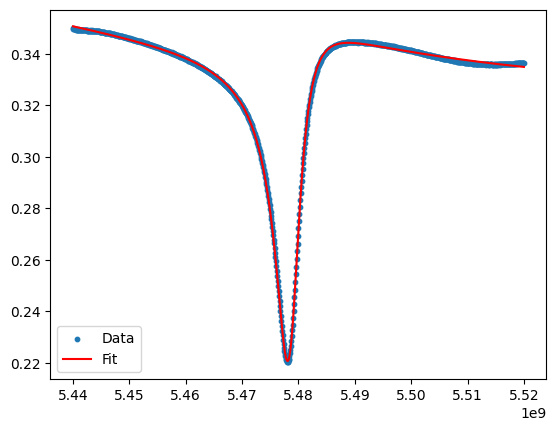

FWHM is:  3760000.0
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1456.9148936170213), 'K': np.float64(0.08651555471904511)}
First total fit converged good, p-value = 1.0
risultati: {'f0': 474118.7617159263, 'phi': 2.6731944519632735, 'Qt': 1097.801947776328, 'Qc': 2292.5881550812605, 'A': 0.5994432874694071, 'B': -2.983684953710525e-10, 'C': 8.074751050110621e-19, 'D': 6.33692262808886e-27, 'K': -0.2582735718862517}


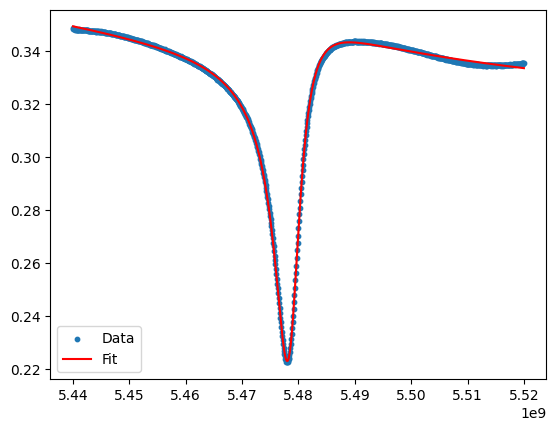

FWHM is:  4000000.0
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1369.46), 'K': np.float64(0.08597067465725297)}
First total fit converged good, p-value = 1.0
risultati: {'f0': 491608.24359709944, 'phi': 2.6813978122270177, 'Qt': 996.4859837883355, 'Qc': 2134.2668650346823, 'A': 0.5891485408331125, 'B': -2.999995145214153e-10, 'C': 7.31755786733846e-19, 'D': 8.179515961916203e-27, 'K': -0.24615986430156175}


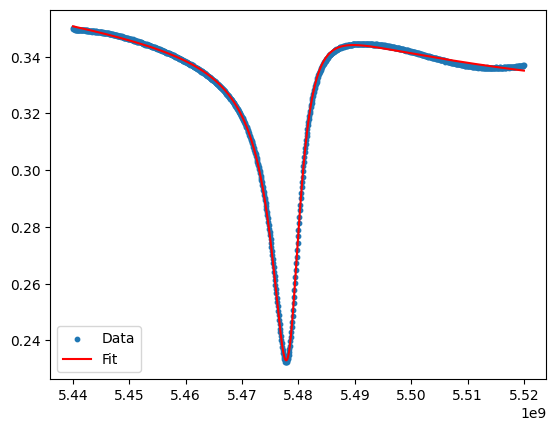

FWHM is:  5600000.0
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(977.8571428571429), 'K': np.float64(0.09131073457851109)}
First total fit converged good, p-value = 1.0
risultati: {'f0': 618349.8780279238, 'phi': 2.7071383718397293, 'Qt': 700.1438531221623, 'Qc': 1761.0802675125592, 'A': 0.5656498814864747, 'B': -3.065761068981127e-10, 'C': -6.131608853169946e-20, 'D': 2.5227317136030748e-26, 'K': -0.22074302892807127}


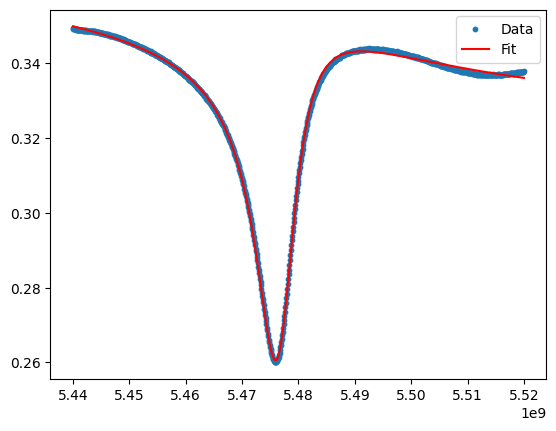

[5.47852659e+09 5.47847412e+09 5.47833161e+09 5.47661835e+09]


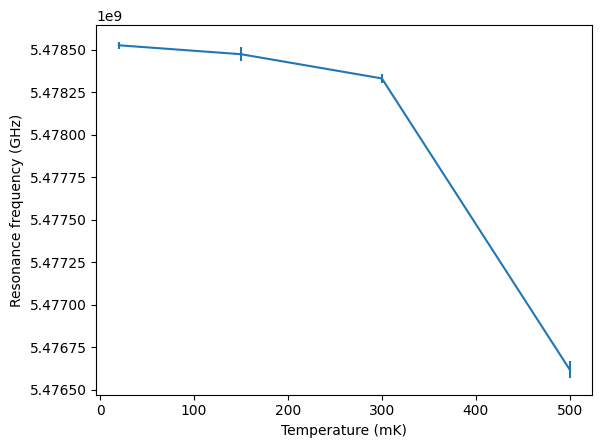

[ 802.45596473 2106.49212948 1869.22372464 1162.18984232]
[11.58838361 20.18265499 24.27485903 24.82224894]


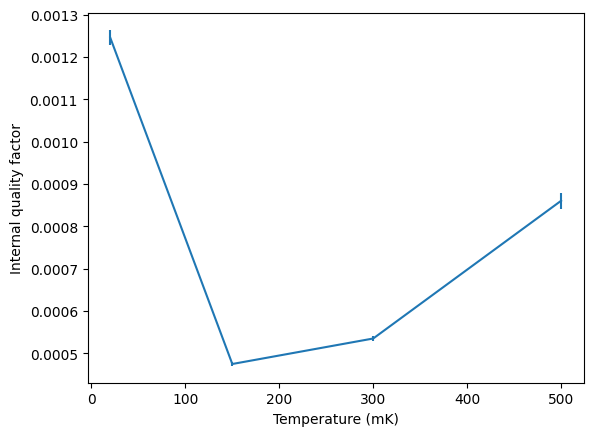

[ 469.90392478 2292.58815508 2134.26686503 1761.08026751]


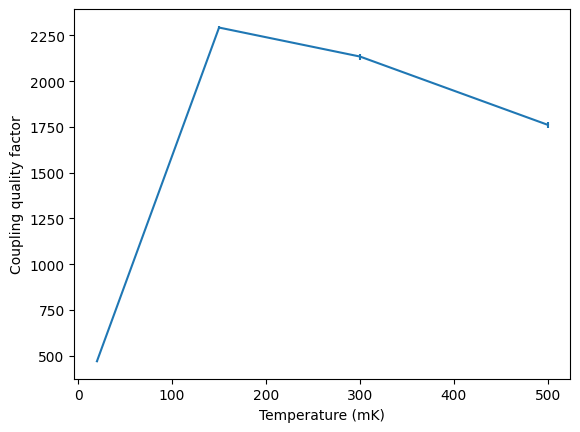

In [30]:
# Example usage
from iminuit.cost import LeastSquares
from FitAPI import Fitter, Model
import numpy as np
import numpy as np
import sys
sys.path.append('../Graphics')
from Graphs import fitPlotter
import matplotlib.pyplot as plt

T = [20, 150, 300, 500]

def S21_model(f: np.ndarray, f0: float, phi: float, Qt: float, Qc: float, A: float, B: float, C: float, D: float, K: float) -> np.ndarray:
    return (A + B*(f-fmin) + C*(f-fmin)**2 + D*(f-fmin)**3) + K * np.abs((1 - (Qt/np.abs(Qc))*np.exp(1j*phi)/(1 + 2j*Qt*((f-fmin) - f0)/fmin)))

initial_guess = {
    "f0": 0.01,
    "phi": 0.01,
    "Qc": 1e3,
    "A": 1.0,
    "B": 1e-9,
    "C": 1e-18,
    "D": 1e-27
}

params_range = {
    #"phi": (-np.pi, np.pi),
    "Qt": (100, 1e8),
    "Qc": (100, 1e8),
   # "f0": (-1e6, 1e6)
}

# Estimate the initial guess of Qt
def peak_width(datax, datay):
    half_height_value = np.min(datay) + (np.max(datay) - np.min(datay)) / np.sqrt(2)
    hits = []
    above = datay[0] > half_height_value
    for i in range(1, len(datay)):
        new_above = datay[i] > half_height_value
        if new_above != above: 
            hits.append((datax[i] + datax[i-1]) / 2)
            above = new_above
    return abs(hits[-1] - hits[0])

result_fr = np.zeros(len(T))
err_fr = np.zeros(len(T))
result_Qi = np.zeros(len(T))
err_Qi = np.zeros(len(T))
result_Qc = np.zeros(len(T))
err_Qc = np.zeros(len(T))

for t in T:
    path = '../Data/fit_test/Resonances/' + str(t) + 'mK_-20dBm.txt'
    data = np.loadtxt(path, delimiter=' ', skiprows=0)
    f = data[:,0]
    y = data[:,1]
    fmin = f[np.argmin(y)]
    # Convert to linear scale
    y = 10**(y/20)
    
    # Estimate the initial guess of Qt
    #Q_i = fmin / peak_width(f, -y)
    #Qt_guess = 1/(1/initial_guess['Qc'] + 1/Q_i)
    Qt_guess = fmin / peak_width(f, -y)
    initial_guess['Qt'] = Qt_guess
    print('FWHM is: ', peak_width(f, -y))
    # Estimate the initial guess of K
    initial_guess['K'] = (np.max(y) - np.min(y)) * initial_guess['Qc'] / initial_guess['Qt']
    print(f"Initial guess: {initial_guess}")

    fit_data = np.column_stack((f, y))
    fitter = Fitter(model_function=S21_model, 
                    param_names=["f0", "phi", "Qt", "Qc", "A", "B", "C", "D", "K"], 
                    params_range=params_range,
                    data=fit_data, 
                    loss_function=LeastSquares,
                    params_initial_guess=initial_guess)

    result = fitter.fit_quasi_magicus()
    result_dict = result.values.to_dict()
    print('risultati:', result_dict)
    err_dict = result.errors.to_dict()
    result_fr[T.index(t)] = result_dict['f0'] + fmin
    err_fr[T.index(t)] = err_dict['f0']
    result_Qi[T.index(t)] = abs((1/result_dict['Qt']-1/result_dict['Qc'])**-1)
    Qt = result_dict['Qt']
    Qc = result_dict['Qc']
    err_Qi[T.index(t)] =  np.sqrt((err_dict['Qt'] * Qt**-2)**2 + (err_dict['Qc'] * Qc**-2)**2) * ((1/Qt-1/Qc)**-2)
    result_Qc[T.index(t)] = result_dict['Qc']
    err_Qc[T.index(t)] = err_dict['Qc']
    
    grapher = fitPlotter(result, f, y, S21_model)
    grapher.simple_plot()

print(result_fr)
plt.errorbar(T, result_fr, err_fr, linestyle='-', label='fr')
plt.ylabel('Resonance frequency (GHz)')
plt.xlabel('Temperature (mK)')
plt.show()
print(result_Qi)
print(err_Qi)
plt.errorbar(T, 1/result_Qi, err_Qi*result_Qi**-2, linestyle='-', label='Qi')
plt.ylabel('Internal quality factor')
plt.xlabel('Temperature (mK)')
plt.show()
print(result_Qc)
plt.errorbar(T, result_Qc, err_Qc, linestyle='-', label='Qc')
plt.ylabel('Coupling quality factor')
plt.xlabel('Temperature (mK)')
plt.show()

# Plot Q_t, Q_c, f_r vs dB


Qt_guess: 1222.5714285714287
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1222.5714285714287), 'K': np.float64(0.0625153164883452)}
First total fit converged good, p-value = 1.0
Qt_guess: 1267.962962962963
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1267.962962962963), 'K': np.float64(0.08098476956530493)}
First total fit converged good, p-value = 1.0
Qt_guess: 1369.46
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1369.46), 'K': np.float64(0.08524025638150125)}
First total fit converged good, p-value = 1.0
Qt_guess: 1456.9148936170213
Initial guess: {'f0': 0.01, 'phi': 0.01, 'Qc': 1000.0, 'A': 1.0, 'B': 1e-09, 'C': 1e-18, 'D': 1e-27, 'Qt': np.float64(1456.9148936170213), 'K': np.float64(0.08552639739910385)}
First total fit converged good, p-value = 1.0
Qt_guess: 1521.66

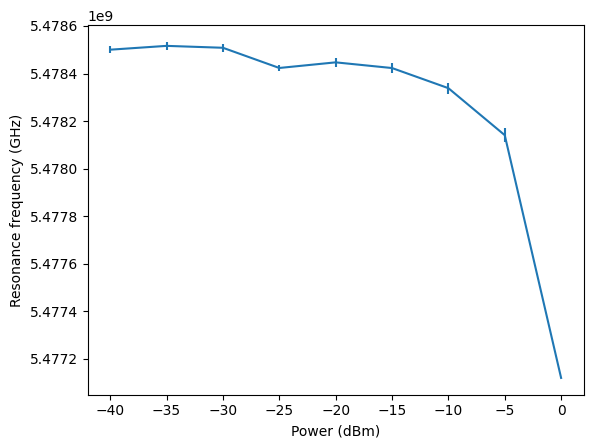

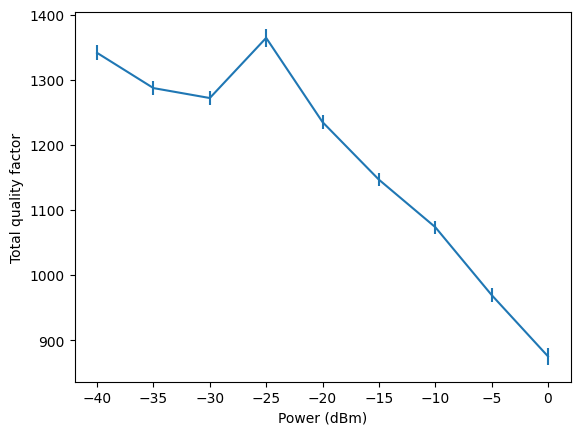

[5.87187044 7.12277199 5.11339079 4.72146309 2.88934207 3.44534565
 4.16185    4.42650594 2.37689123]


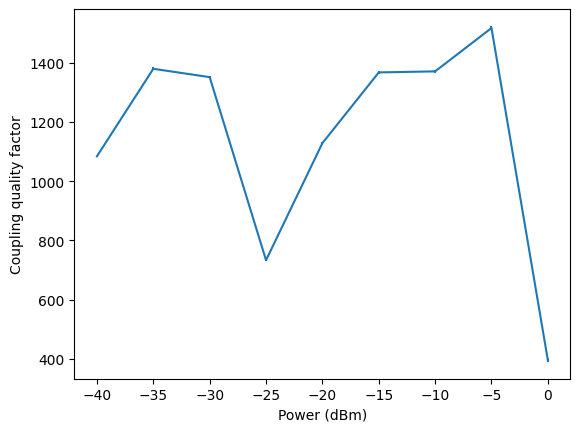

In [28]:
# Example usage
from iminuit.cost import LeastSquares
from FitAPI import Fitter, Model
import numpy as np
import numpy as np
import sys
sys.path.append('../Graphics')
from Graphs import fitPlotter
import matplotlib.pyplot as plt

dB = [0, -5, -10, -15, -20, -25, -30, -35, -40]

def S21_model(f: np.ndarray, f0: float, phi: float, Qt: float, Qc: float, A: float, B: float, C: float, D: float, K: float) -> np.ndarray:
    return (A + B*(f-fmin) + C*(f-fmin)**2 + D*(f-fmin)**3) + K * np.abs((1 - (Qt/np.abs(Qc))*np.exp(1j*phi)/(1 + 2j*Qt*((f-fmin) - f0)/fmin)))

initial_guess = {
    "f0": 0.01,
    "phi": 0.01,
    "Qc": 1e3,
    "A": 1.0,
    "B": 1e-9,
    "C": 1e-18,
    "D": 1e-27
}

# Estimate the initial guess of Qt
def peak_width(datax, datay):
    half_height_value = np.min(datay) + (np.max(datay) - np.min(datay)) / np.sqrt(2)
    hits = []
    above = datay[0] > half_height_value
    for i in range(1, len(datay)):
        new_above = datay[i] > half_height_value
        if new_above != above: 
            hits.append((datax[i] + datax[i-1]) / 2)
            above = new_above
    return abs(hits[-1] - hits[0])

result_fr = np.zeros(len(dB))
err_fr = np.zeros(len(dB))
result_Qt = np.zeros(len(dB))
err_Qt = np.zeros(len(dB))
result_Qc = np.zeros(len(dB))
err_Qc = np.zeros(len(dB))

for db in dB:
    path = '../Data/fit_test/Resonances/20mK_' + str(db) + 'dBm.txt'
    data = np.loadtxt(path, delimiter=' ', skiprows=0)
    f = data[:,0]
    y = data[:,1]
    fmin = f[np.argmin(y)]
    # Convert to linear scale
    y = 10**(y/20)
    

    # Estimate the initial guess of Qt
    #Q_i = fmin / peak_width(f, -y)
    #Qt_guess = 1/(1/initial_guess['Qc'] + 1/Q_i)
    Qt_guess = fmin / peak_width(f, -y)
    print(f"Qt_guess: {Qt_guess}")
    initial_guess['Qt'] = Qt_guess

    # Estimate the initial guess of K
    initial_guess['K'] = (np.max(y) - np.min(y)) * initial_guess['Qc'] / initial_guess['Qt']
    print(f"Initial guess: {initial_guess}")

    fit_data = np.column_stack((f, y))
    fitter = Fitter(model_function=S21_model, 
                    param_names=["f0", "phi", "Qt", "Qc", "A", "B", "C", "D", "K"], 
                    data=fit_data, 
                    loss_function=LeastSquares,
                    params_initial_guess=initial_guess)

    result = fitter.fit_quasi_magicus()
    result_dict = result.values.to_dict()
    err_dict = result.errors.to_dict()
    result_fr[dB.index(db)] = result_dict['f0'] + fmin
    err_fr[dB.index(db)] = err_dict['f0']
    result_Qt[dB.index(db)] = result_dict['Qt']
    err_Qt[dB.index(db)] = err_dict['Qt']
    result_Qc[dB.index(db)] = result_dict['Qc']
    err_Qc[dB.index(db)] = err_dict['Qc']


plt.errorbar(dB, result_fr, err_fr, linestyle='-', label='fr')
plt.ylabel('Resonance frequency (GHz)')
plt.xlabel('Power (dBm)')
plt.show()
plt.errorbar(dB, result_Qt, err_Qt, linestyle='-', label='Qt')
plt.ylabel('Total quality factor')
plt.xlabel('Power (dBm)')
plt.show()
plt.errorbar(dB, result_Qc, err_Qc, linestyle='-', label='Qc')
plt.ylabel('Coupling quality factor')
plt.xlabel('Power (dBm)')
plt.show()